<a href="https://colab.research.google.com/github/Yango4you/FP_TUM/blob/main/TripletSemiHardLoss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import io
import numpy as np
import tensorflow as tf

!pip install tensorflow_addons
import tensorflow_addons as tfa
from tensorflow.keras import layers,models
from tensorflow.keras.datasets import cifar10
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

     |████████████████████████████████| 1.1 MB 5.1 MB/s 


In [4]:
def _normalize_img(img, label):
    img = tf.cast(img, tf.float32) / 255.
    return (img, label)

train_dataset, test_dataset = tfds.load(name="cifar10", split=['train', 'test'], as_supervised=True)

# Build your input pipelines
train_dataset = train_dataset.shuffle(1024).batch(32)
train_dataset = train_dataset.map(_normalize_img)

test_dataset = test_dataset.batch(32)
test_dataset = test_dataset.map(_normalize_img)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incomplete5QKK85/cifar10-train.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incomplete5QKK85/cifar10-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=None), # No activation on final dense layer
    tf.keras.layers.Lambda(lambda x: tf.math.l2_normalize(x, axis=1)) # L2 normalize embeddings
])

In [6]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.01),
    loss=tfa.losses.TripletSemiHardLoss(margin=0.2,soft= True),
    metrics=['accuracy'])

history = model.fit(train_dataset, epochs= 40,
    validation_data=(test_dataset))

Epoch 1/40
1563/1563 [==============================] - 154s 97ms/step - loss: 0.1511 - accuracy: 0.0049 - val_loss: 0.1329 - val_accuracy: 0.0042
Epoch 2/40
1563/1563 [==============================] - 136s 87ms/step - loss: 0.1359 - accuracy: 0.0036 - val_loss: 0.1312 - val_accuracy: 0.0024
Epoch 3/40
1563/1563 [==============================] - 135s 86ms/step - loss: 0.1307 - accuracy: 0.0049 - val_loss: 0.1327 - val_accuracy: 0.0045
Epoch 4/40
1563/1563 [==============================] - 135s 86ms/step - loss: 0.1281 - accuracy: 0.0043 - val_loss: 0.1267 - val_accuracy: 0.0019
Epoch 5/40
1563/1563 [==============================] - 136s 87ms/step - loss: 0.1273 - accuracy: 0.0032 - val_loss: 0.1297 - val_accuracy: 0.0018
Epoch 6/40
1563/1563 [==============================] - 135s 86ms/step - loss: 0.1254 - accuracy: 0.0028 - val_loss: 0.1249 - val_accuracy: 0.0020
Epoch 7/40
1563/1563 [==============================] - 134s 86ms/step - loss: 0.1253 - accuracy: 0.0030 - val_loss: 0

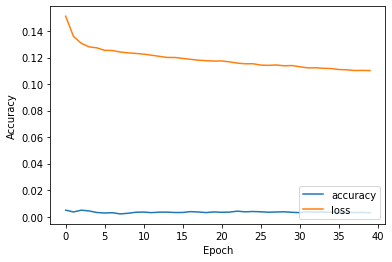

313/313 - 7s - loss: 0.1015 - accuracy: 0.0022 - 7s/epoch - 22ms/step
0.002199999988079071


In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_dataset, verbose=2)
print(test_acc)

In [25]:
results = model.predict(test_dataset)

In [26]:
# Save test embeddings for visualization in projector
np.savetxt("vecs.tsv", results, delimiter='\t')

out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for img, labels in tfds.as_numpy(test_dataset):
    [out_m.write(str(x) + "\n") for x in labels]
out_m.close()


try:
  from google.colab import files
  files.download('vecs.tsv')
  files.download('meta.tsv')
except:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>